In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)

Parameters and Example Data

In [203]:
y = np.load('data/y.npy')
sigma = np.load('data/sigma.npy')
sigma_inv = np.load('data/sigma_inv.npy')
T=90 # Steps
K=2 # Changepoints
P=10 # Variables
M=5 # Active Edges
eps = 0.000001 # Edge threshold epsilon

In [188]:
def get_edges(G, eps, P=None):
    # get edges of adjacency matrix G
    P = P or G.shape[0]
    return [(i, j) for i in range(P-1) for j in range(i+1, P) if abs(G[i, j]) > eps]

In [194]:
def get_change_points(Theta, eps, T=None, P=None):
    # calculate histogram of change points of T adjacency matrices
    T = T or Theta.shape[0]
    P = P or Theta.shape[1]
    # difference between consecutive adjacency matrices
    Delta_Theta = np.diff(Theta, axis=0)
    return [len(get_edges(G, eps, P)) for G in Delta_Theta]

In [229]:
def plot_data_with_cps(data, cps, ymin, ymax):
    plt.plot(data, alpha=0.5)
    for cp in cps:
        plt.plot([cp, cp], [ymin, ymax], 'k-')
    plt.axis([0, len(data), ymin, ymax], 'k-')
    plt.show()

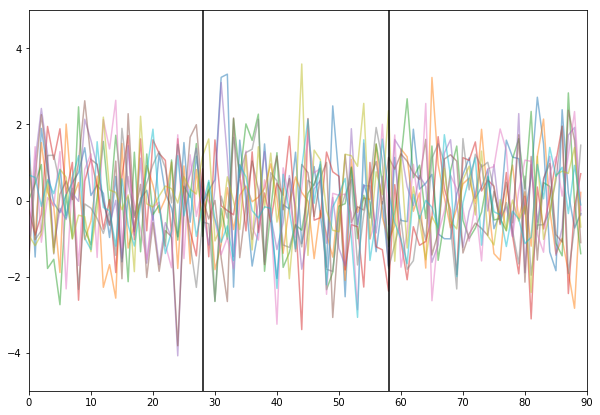

In [232]:
edges = get_edges(sigma_inv[0], eps, P)
change_point_hist = get_change_points(sigma_inv, eps, T, P)
change_points = [i for i, cp in enumerate(change_point_hist) if cp > 0]
plot_data_with_cps(y, change_points, ymin=-5, ymax=5)

In [234]:
verbose = False
smoother = 'GFGL'
tol = 1e-4
max_iter = 500
gammas = [1, 1, 1] # gamma_V1, gamma_V2, gamma_W
lambda1G = 0.5
lambda2G = 30
lambda1I = 0.25
lambda2I = 2

#... run Est_Graph = gtADMM(y, lambda1G, lambda2G, opt)
# change_points --> plot stuff
# afterwards the same for 
smoother = 'IFGL'

In [238]:
ZG = gtADMM(y, lambda1G, lambda2G, *gammas, max_iter, tol, smoother, verbose)

0.5 30 1 1 1 500 0.0001 IFGL False


In [237]:
# smoother 'IFGL' also possible
def gtADMM(X, lambda1, lambda2, gammav1, gammav2, gammaw, maxiter, tol, smoother='GFGL', verbose=False):
    print(lambda1, lambda2, gammav1, gammav2, gammaw, maxiter, tol, smoother, verbose)
    pass

In [240]:
a, b= y.shape
a,b

(90, 10)

In [241]:
def gtADMM(X, lambda1, lambda2, gamma_v1, gamma_v2, gamma_w, max_iter, tol, smoother='GFGL', verbose=False):
    T, P = X.shape
    # don't use pre-smoothing
    S = zeros((T, P, P))
    for t in range(T):
        S[t] = X[t] * X[t].T
    # dev with kernel pre-smoothing maybe?
    
    # auxiliary variables
    V1 = zeros((T, P, P))
    V2 = zeros((T-1, P, P))
    # differencing aux variable
    W = zeros((T-1, P, P))